In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
matplotlib.rc('font',family = 'NanumGothicCoding')

In [14]:
df_raw = pd.read_csv("./data/체질검사.csv", encoding = '949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [15]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

In [16]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [17]:
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Score on trainning set : 0.181
Score on test set : -0.036


In [18]:
feature_names = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = feature_names)
df_scaled.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712


In [11]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('train data Y size : {}'.format(df_scaled_test_x.shape))


train data X size : (176, 13)
train data Y size : (76, 13)


## Scale 변환 데이터

In [20]:
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on trainning set : 0.578
Score on test set : 0.499


In [21]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## C규제 변경

In [24]:
train_score = [];test_score=[]
para_c = [10 ** c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVR(C = v_C)
    
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
#저장
df_score_C = pd.DataFrame()
df_score_C['C'] = para_c
df_score_C['TrainScore'] = train_score
df_score_C['TestScore'] = test_score

In [25]:
df_score_C.round(3)

,C,TrainScore,TestScore
0,0.01,0.018,-0.025
1,0.10,0.151,0.110
2,1.00,0.578,0.499
3,10.00,0.846,0.538
4,100.00,0.953,0.446


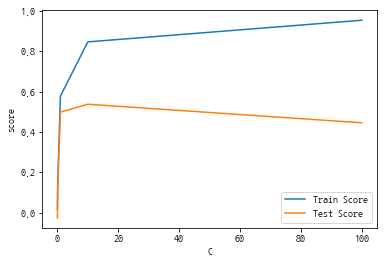

In [27]:
plt.plot(para_c, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_c, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('C')
plt.legend()

In [39]:
train_score = [];  test_score = []
# para_gamma = [10**gamma for gamma in range(-2,3)]
para_gamma = [0.01*gamma for gamma in range(1,9)]

for v_gamma in para_gamma:
    svm = SVR(gamma = v_gamma, C = 10)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
df_score_gamma = pd.DataFrame()
df_score_gamma['gamma'] = para_gamma
df_score_gamma['TrainScore'] = train_score
df_score_gamma['TestScore'] = test_score

In [40]:
df_score_gamma.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.764,0.594
1,0.02,0.783,0.567
2,0.03,0.797,0.554
3,0.04,0.810,0.554
4,0.05,0.821,0.549
5,0.06,0.830,0.545
6,0.07,0.840,0.541
7,0.08,0.849,0.537


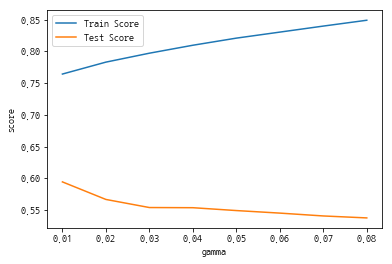

In [41]:
plt.plot(para_gamma, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_gamma, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('gamma')
plt.legend()